<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Predictive-Modeling" data-toc-modified-id="Predictive-Modeling-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Predictive Modeling</a></span><ul class="toc-item"><li><span><a href="#Helper-Functions" data-toc-modified-id="Helper-Functions-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Helper Functions</a></span><ul class="toc-item"><li><span><a href="#Prediction-Plot" data-toc-modified-id="Prediction-Plot-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Prediction Plot</a></span></li></ul></li><li><span><a href="#Target-variable:-TEMPERATURE" data-toc-modified-id="Target-variable:-TEMPERATURE-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Target variable: TEMPERATURE</a></span></li><li><span><a href="#Creating-a-train/test-split" data-toc-modified-id="Creating-a-train/test-split-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Creating a train/test split</a></span></li><li><span><a href="#Linear-Regression-with-sklearn" data-toc-modified-id="Linear-Regression-with-sklearn-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Linear Regression with sklearn</a></span></li><li><span><a href="#Polynomial-Regression" data-toc-modified-id="Polynomial-Regression-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Polynomial Regression</a></span></li><li><span><a href="#GradientBoostingRegressor" data-toc-modified-id="GradientBoostingRegressor-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>GradientBoostingRegressor</a></span></li><li><span><a href="#AdaBoostRegressor" data-toc-modified-id="AdaBoostRegressor-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>AdaBoostRegressor</a></span></li><li><span><a href="#Random-Forest-Regressor" data-toc-modified-id="Random-Forest-Regressor-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Random-Forest-Regressor</a></span></li><li><span><a href="#XGBoost-Regressor" data-toc-modified-id="XGBoost-Regressor-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>XGBoost Regressor</a></span><ul class="toc-item"><li><span><a href="#XGBoost-Regressor-for-2018" data-toc-modified-id="XGBoost-Regressor-for-2018-1.9.1"><span class="toc-item-num">1.9.1&nbsp;&nbsp;</span>XGBoost Regressor for 2018</a></span></li></ul></li><li><span><a href="#KNeighborsRegressor" data-toc-modified-id="KNeighborsRegressor-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>KNeighborsRegressor</a></span></li><li><span><a href="#Support-Vector-Regressor" data-toc-modified-id="Support-Vector-Regressor-1.11"><span class="toc-item-num">1.11&nbsp;&nbsp;</span>Support Vector Regressor</a></span></li><li><span><a href="#Auto-Regressive-Integrated-Moving-Average---ARIMA" data-toc-modified-id="Auto-Regressive-Integrated-Moving-Average---ARIMA-1.12"><span class="toc-item-num">1.12&nbsp;&nbsp;</span>Auto Regressive Integrated Moving Average - ARIMA</a></span></li><li><span><a href="#SARIMAX-Regression" data-toc-modified-id="SARIMAX-Regression-1.13"><span class="toc-item-num">1.13&nbsp;&nbsp;</span>SARIMAX Regression</a></span></li></ul></li></ul></div>

# Predictive Modeling
Temperature
Regression and ARIMA (SARIMAX)

In [27]:
# importing packages

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import xgboost as xgb
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import fbeta_score, accuracy_score
from sklearn import decomposition
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import norm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn import model_selection, preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
import statsmodels.api as sm
from sklearn.model_selection import TimeSeriesSplit
sns.set()

## Helper Functions

In [28]:

def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(test_labels, [1 for _ in range(len(test_labels))])
    baseline['precision'] = precision_score(test_labels, [1 for _ in range(len(test_labels))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(test_labels, predictions)
    results['precision'] = precision_score(test_labels, predictions)
    results['roc'] = roc_auc_score(test_labels, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(train_labels, train_predictions)
    train_results['precision'] = precision_score(train_labels, train_predictions)
    train_results['roc'] = roc_auc_score(train_labels, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(test_labels, [1 for _ in range(len(test_labels))])
    model_fpr, model_tpr, _ = roc_curve(test_labels, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline', linewidth=3)
    plt.plot(model_fpr, model_tpr, 'r', label = 'model', linewidth=3)
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');


In [29]:
def feature_plot(importances, X_train, y_train):
    
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:10]]
    values = importances[indices][:10]

    # Creat the plot
    fig = plt.figure(figsize = (12,8))
    plt.title("Normalized Weights for First Ten Most Predictive Features", fontsize = 16)
    plt.bar(np.arange(10), values, width = 0.6, align="center", color = '#3296c8', \
          label = "Feature Weight") #'#00A000'
    plt.bar(np.arange(10) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = '#c8dcb4', \
          label = "Cumulative Feature Weight")  #'#0AA0A0' '#96c896'
    plt.xticks(np.arange(10), columns, rotation=45)
    plt.xlim((-0.5, 9.5))
    plt.ylabel("Weight", fontsize = 12)
    plt.xlabel("Feature", fontsize = 12)
    
    plt.legend(loc = 'upper center')
    plt.tight_layout()
    plt.savefig('ROC_XGB.png', dpi=500)
    plt.show()

In [30]:
# helper function for polynomial regression

def create_polynomial_regression_model(degree):
    "Creates a polynomial regression model for the given degree"
    
    poly_features = PolynomialFeatures(degree=degree)
  
  # transforms the existing features to higher degree features.
    X_train_poly = poly_features.fit_transform(X_train)
  
  # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, Y_train)
  
  # predicting on training data-set
    y_train_predicted = poly_model.predict(X_train_poly)
  
  # predicting on test data-set
    y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
  # evaluating the model on training dataset
    rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
    r2_train = r2_score(Y_train, y_train_predicted)
  
  # evaluating the model on test dataset
    rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
    r2_test = r2_score(Y_test, y_test_predict)
    
    #print("The model performance for the training set")
    #print("-------------------------------------------")
    #print("RMSE of training set is {}".format(rmse_train))
    #print("R2 score of training set is {}".format(r2_train))
  
    #print("\n")
  
    #print("The model performance for the test set")
    #print("------------------------------------------")
    #print("RMSE of test set is {}".format(rmse_test))
    #print("R2 score of test set is {}".format(r2_test))
    


### Prediction Plot

In [31]:
def prediction_plot(x,y,z,a,b):
    
    #plt.figure(figsize=(15,10))     
    plt.plot(x.values)
    plt.plot(y)
    plt.suptitle(b,fontsize=15)
    plt.ylabel(z)
    plt.xlabel('Hour')
    plt.ylim(8,24) # -6,10    -2.5,22.5    8,22   0,24  
    labels=('actual','predicted')
    plt.legend(labels)
    plt.savefig(a, dpi=500);

In [68]:
## load cleaned weather data

df = pd.read_csv('weather_data_cleaned.csv', index_col='MESS_DATUM', parse_dates=True)
df = df.iloc[:,1:]
df

,ATMO_LBERG,FD_LBERG,FG_LBERG,SD_LBERG,ZENIT,R1,TT_TU,RF_TU,TD,V_N,P,FF,DD,V_TE005,V_TE010,V_TE020,V_TE050,V_TE100,V_VV
MESS_DATUM,,,,,,,,,,,,,,,,,,,
2005-01-01 00:00:00,120.0,0.0,0.0,0.0,148.86,0.0,4.7,95.0,4.0,7.0,1020.2,2.2,350.0,5.6,5.50,5.20,4.6,5.20,2000.0
2005-01-01 01:00:00,100.0,0.0,0.0,0.0,144.98,0.1,4.3,95.0,3.6,7.0,1020.5,1.5,310.0,5.3,5.40,5.20,4.6,5.10,3500.0
2005-01-01 02:00:00,89.0,0.0,0.0,0.0,138.39,0.0,3.1,96.0,2.5,2.0,1021.3,1.5,280.0,4.7,5.10,5.10,4.6,5.10,800.0
2005-01-01 06:00:00,113.0,0.0,0.0,0.0,104.08,0.0,2.0,98.0,1.7,8.0,1022.0,2.3,220.0,3.7,4.20,4.70,4.8,5.20,3500.0
2005-01-01 07:00:00,114.0,0.0,0.0,0.0,96.06,0.0,2.7,100.0,2.7,7.0,1021.8,2.8,210.0,3.6,4.00,4.50,4.7,5.20,4500.0
2005-01-01 08:00:00,117.0,3.0,3.0,0.0,88.98,0.2,3.7,100.0,3.7,8.0,1021.7,3.4,210.0,3.6,4.00,4.50,4.7,5.20,1800.0
2005-01-01 09:00:00,116.0,10.0,10.0,0.0,83.19,0.0,4.3,97.0,3.9,8.0,1022.1,3.3,220.0,3.8,4.00,4.40,4.8,5.30,4500.0
2005-01-01 10:00:00,115.0,23.0,23.0,0.0,79.05,0.0,5.1,93.0,4.0,7.0,1021.6,4.3,230.0,4.0,4.00,4.40,4.8,5.30,12000.0
2005-01-01 11:00:00,116.0,20.0,20.0,0.0,76.88,0.0,5.3,92.0,4.1,7.0,1021.2,4.6,220.0,4.3,4.20,4.40,4.7,5.30,8000.0


## Target variable: TEMPERATURE

In [33]:
## Linear Regression for temperature with all variables to look on the significance

model = 'TT_TU ~ ATMO_LBERG + FD_LBERG + FG_LBERG + SD_LBERG + ZENIT + R1 + RF_TU + TD + V_N + V_S1_CS + V_S1_HHS + P + FF + DD + V_TE005 + V_TE010 + V_TE020 + V_TE050 + V_TE100 + V_VV'
smf.ols(formula=model, data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  TT_TU   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.224e+06
Date:                Mon, 06 Jan 2020   Prob (F-statistic):               0.00
Time:                        11:10:29   Log-Likelihood:            -1.0993e+05
No. Observations:              134437   AIC:                         2.199e+05
Df Residuals:                  134416   BIC:                         2.201e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.4564      0.179    131.291      0.000      23.106      23.807
ATMO_LBERG     0.0075      0.000     48.798      0.000       0.007       0.008
FD_LBERG      -0.0074    9.7e-05    -76.617      0.000      -0.008      -0.007
FG_LBERG       0.0017    7.2e-05     23.200      0.000       0.002       0.002
SD_LBERG       0.0026      0.000     18.315      0.000       0.002       0.003
ZENIT          0.0038   9.19e-05     40.812      0.000       0.004       0.004
R1             0.0314      0.003      9.592      0.000       0.025       0.038
RF_TU         -0.2020      0.000   -852.053      0.000      -0.202      -0.202
TD             0.9293      0.001   1237.356      0.000       0.928       0.931
V_N           -0.0157      0.001    -17.450      0.000      -0.017      -0.014
V_S1_CS        0.0068      0.002      3.887      0.000       0.003       0.010
V_S1_HHS    2.162e-05   2.03e-06     10.650      0.000    1.76e-05    2.56e-05
P             -0.0047      0.000    -27.880      0.000      -0.005      -0.004
FF            -0.0366      0.001    -43.301      0.000      -0.038      -0.035
DD            -0.0002   1.71e-05    -11.175      0.000      -0.000      -0.000
V_TE005        0.1959      0.005     36.945      0.000       0.185       0.206
V_TE010        0.0408      0.012      3.488      0.000       0.018       0.064
V_TE020       -0.2482      0.011    -22.614      0.000      -0.270      -0.227
V_TE050        0.1285      0.007     19.408      0.000       0.115       0.141
V_TE100       -0.0314      0.003    -11.274      0.000      -0.037      -0.026
V_VV       -1.001e-05   1.61e-07    -62.290      0.000   -1.03e-05    -9.7e-06
==============================================================================
Omnibus:                    82390.385   Durbin-Watson:                   0.232
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2271358.910
Skew:                           2.483   Prob(JB):                         0.00
Kurtosis:                      22.515   Cond. No.                     3.29e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
corr = df.corr()
corr
best_corr = corr.TT_TU[abs(corr.TT_TU) > 0.3]
best_corr


ATMO_LBERG    0.581527
FD_LBERG      0.412200
FG_LBERG      0.478398
SD_LBERG      0.377009
ZENIT        -0.518277
TT_TU         1.000000
RF_TU        -0.520045
TD            0.867519
V_TE005       0.951536
V_TE010       0.932807
V_TE020       0.894471
V_TE050       0.848419
V_TE100       0.805383
V_VV          0.393779
Name: TT_TU, dtype: float64

In [28]:
## Linear Regression with best correlated and most significant variables
## dropping dew point because it contains information about temperature and soil temperatures 

model = 'TT_TU ~ ATMO_LBERG + FD_LBERG + FG_LBERG + ZENIT + RF_TU + V_VV + C(V_N)+V_TE005'
smf.ols(formula=model, data=df).fit().summary()

## best prediction with solar data, zenith angle of sun, relative humidity, visibility and cloud coverage 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  TT_TU   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 1.036e+05
Date:                Tue, 07 Jan 2020   Prob (F-statistic):               0.00
Time:                        10:13:20   Log-Likelihood:            -2.9006e+05
No. Observations:              134437   AIC:                         5.802e+05
Df Residuals:                  134421   BIC:                         5.803e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -3.8906      0.082    -47.307      0.000      -4.052      -3.729
C(V_N)[T.1.0]     0.3303      0.032     10.405      0.000       0.268       0.393
C(V_N)[T.2.0]     0.4777      0.034     14.255      0.000       0.412       0.543
C(V_N)[T.3.0]     0.3812      0.034     11.319      0.000       0.315       0.447
C(V_N)[T.4.0]     0.3595      0.036     10.126      0.000       0.290       0.429
C(V_N)[T.5.0]     0.4623      0.034     13.533      0.000       0.395       0.529
C(V_N)[T.6.0]     0.4971      0.033     15.173      0.000       0.433       0.561
C(V_N)[T.7.0]     0.3864      0.029     13.168      0.000       0.329       0.444
C(V_N)[T.8.0]    -0.0829      0.031     -2.656      0.008      -0.144      -0.022
ATMO_LBERG        0.0707      0.001    125.986      0.000       0.070       0.072
FD_LBERG         -0.0076      0.000    -20.975      0.000      -0.008      -0.007
FG_LBERG          0.0032      0.000     18.729      0.000       0.003       0.004
ZENIT         -7.415e-05      0.000     -0.222      0.824      -0.001       0.001
RF_TU            -0.0308      0.001    -53.577      0.000      -0.032      -0.030
V_VV          -1.193e-05   5.94e-07    -20.077      0.000   -1.31e-05   -1.08e-05
V_TE005           0.7583      0.001    616.311      0.000       0.756       0.761
==============================================================================
Omnibus:                     8905.449   Durbin-Watson:                   0.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15978.523
Skew:                          -0.498   Prob(JB):                         0.00
Kurtosis:                       4.364   Cond. No.                     4.14e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Creating a train/test split

In [9]:
# train/test split 
X = df[['ATMO_LBERG', 'FD_LBERG', 'FG_LBERG', 'ZENIT', 'V_VV', 'V_N','V_TE005']]
Y = df.TT_TU

# choosing 9 days to test winter, summer, autumn and spring
X_test_winter = ['2019-01-02','2019-01-03','2019-01-04','2019-01-05','2019-01-06',
                '2019-01-07','2019-01-08','2019-01-09','2019-01-10']
X_test_summer = ['2019-07-02','2019-07-03','2019-07-04','2019-07-05','2019-07-06',
                '2019-07-07','2019-07-08','2019-07-09','2019-07-10']
X_test_autumn = ['2019-10-02','2019-10-03','2019-10-04','2019-10-05','2019-10-06',
                '2019-10-07','2019-07-08','2019-07-09','2019-07-10']
X_test_spring = ['2019-04-02','2019-04-03','2019-04-04','2019-04-05','2019-04-06',
                '2019-04-07','2019-04-08','2019-04-09','2019-04-10']

X_train_winter = ['2019-01-01','2019-01-02','2019-01-03','2019-01-04','2019-01-05',
                '2019-01-06','2019-01-07','2019-01-08','2019-01-09']
X_train_summer = ['2019-07-01','2019-07-02','2019-07-03','2019-07-04','2019-07-05',
                '2019-07-06','2019-07-07','2019-07-08','2019-07-09']
X_train_autumn = ['2019-10-01','2019-10-02','2019-10-03','2019-10-04','2019-10-05',
                '2019-10-06','2019-07-07','2019-07-08','2019-07-09']
X_train_spring = ['2019-04-01','2019-04-02','2019-04-03','2019-04-04','2019-04-05',
                '2019-04-06','2019-04-07','2019-04-08','2019-04-09']


## Linear Regression with sklearn

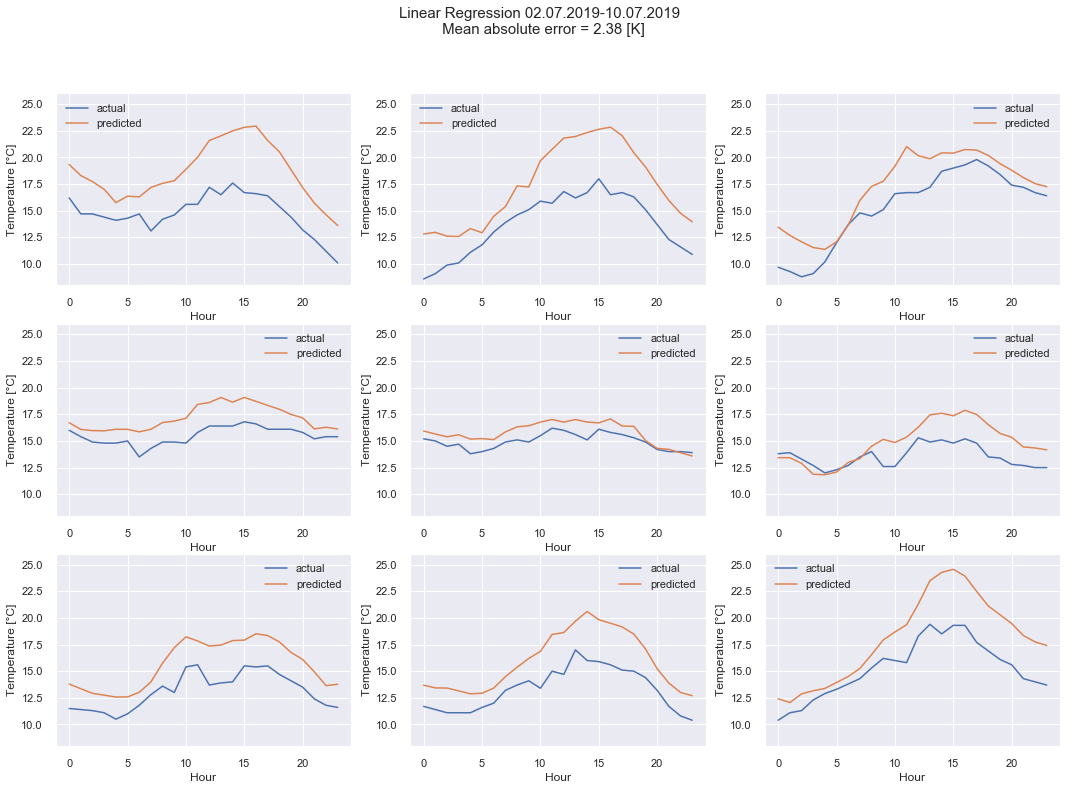

In [451]:
# linear regression for temperature with sklearn
plt.figure(figsize=(18,12))
mae_sum=0
rmse_sum=0
r2_sum=0
for i,j,k in zip(X_test_summer, X_train_summer, range(9)):
    
    X_train = X.loc[:j]
    X_test = X.loc[i]
    Y_train = Y.loc[:j]
    Y_test = Y.loc[i]
    
    lin_model = LinearRegression()
    lin_model.fit(X_train, Y_train)

    y_pred = lin_model.predict(X_test)

    # Metrics
    mae0 = mean_absolute_error(Y_test.values.ravel(), y_pred)
    rmse0 = np.sqrt(mean_squared_error(Y_test.values.ravel(), y_pred))
    r2 = r2_score(Y_test.values.ravel(), y_pred)

    mae_sum+=abs(mae0)
    rmse_sum+=abs(rmse0)
    r2_sum+=abs(r2)
    
    plt.subplot(3,3,k+1)
    prediction_plot(Y_test, y_pred,'Temperature [°C]','Images/Temp_LinReg_summer.png','Linear Regression 02.07.2019-10.07.2019 \n Mean absolute error = '+str(round(mae_sum/9,2))+' [K]')
    


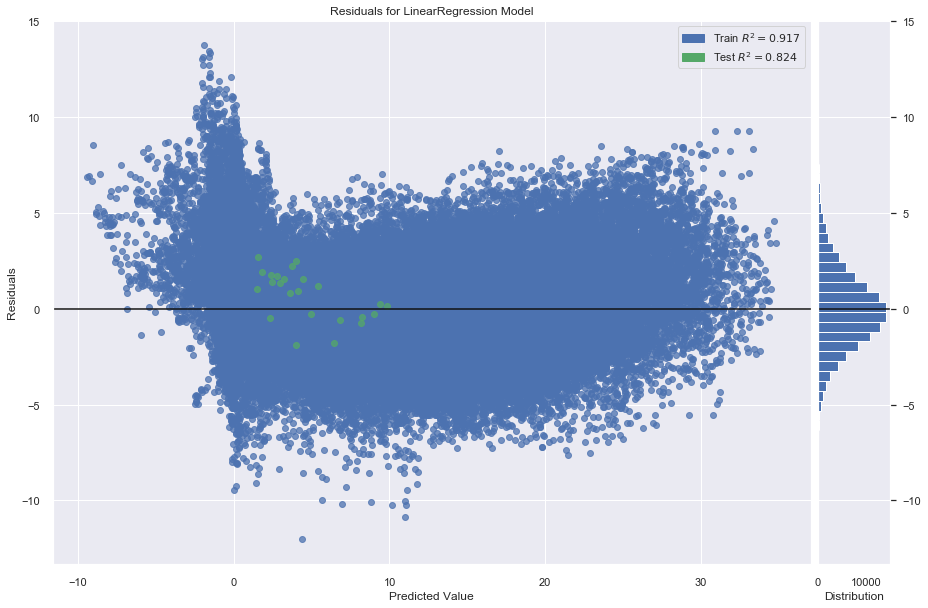

In [177]:

visualizer = ResidualsPlot(lin_model, size=(1080,720))
visualizer.fit(X_train, Y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, Y_test)  # Evaluate the model on the test data
visualizer.show();          

## Polynomial Regression

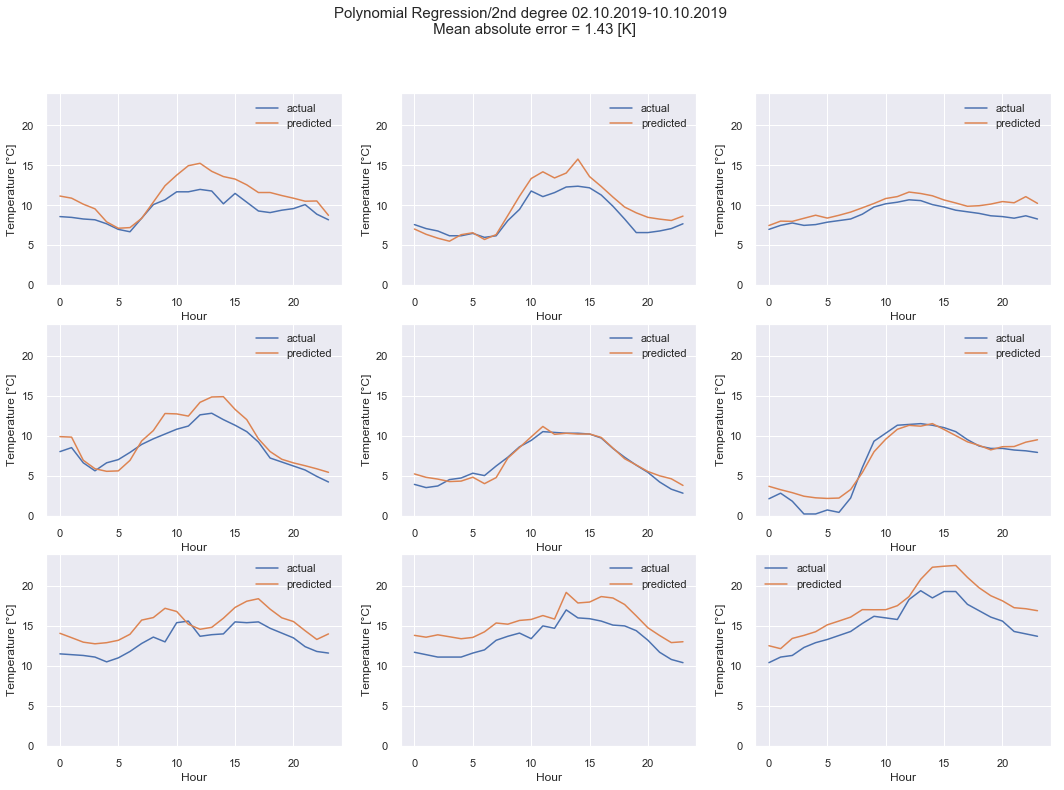

In [462]:
plt.figure(figsize=(18,12))
mae_sum=0

for i,j,k in zip(X_test_autumn, X_train_autumn, range(9)):
    
    X_train = X.loc[:j]
    X_test = X.loc[i]
    Y_train = Y.loc[:j]
    Y_test = Y.loc[i]
    
    poly_features = PolynomialFeatures(degree=2)
  
  # transforms the existing features to higher degree features.
    X_train_poly = poly_features.fit_transform(X_train)
  
  # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, Y_train)
  
  # predicting on test data-set
    y_pred = poly_model.predict(poly_features.fit_transform(X_test))
  
    # Metrics
    mae0 = mean_absolute_error(Y_test.values.ravel(), y_pred)
    rmse0 = np.sqrt(mean_squared_error(Y_test.values.ravel(), y_pred))
    r2 = r2_score(Y_test.values.ravel(), y_pred)
    
    mae_sum+=abs(mae0)
    plt.subplot(3,3,k+1)
    prediction_plot(Y_test, y_pred,'Temperature [°C]','Images/Temp_Poly_autumn.png','Polynomial Regression/2nd degree 02.10.2019-10.10.2019 \n Mean absolute error = '+str(round(mae_sum/9,2))+' [K]')
    

## GradientBoostingRegressor

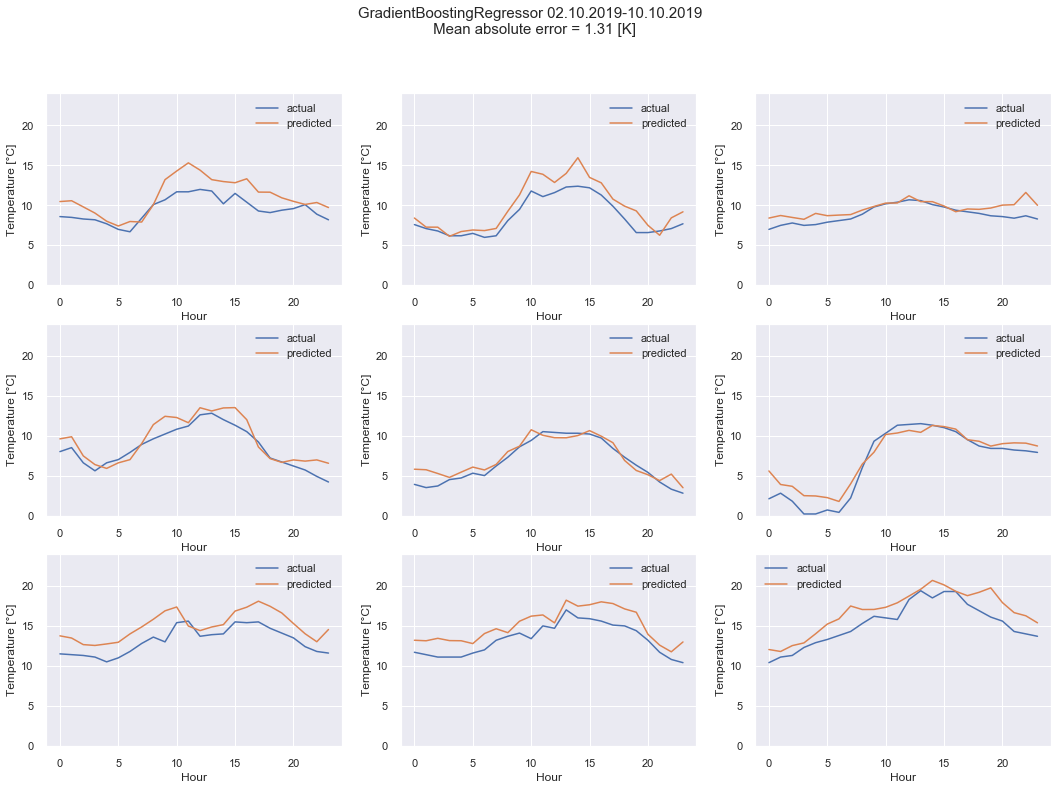

In [470]:
from sklearn.ensemble import GradientBoostingRegressor

plt.figure(figsize=(18,12))
mae_sum=0

for i,j,k in zip(X_test_autumn, X_train_autumn, range(9)):
    
    X_train = X.loc[:j]
    X_test = X.loc[i]
    Y_train = Y.loc[:j]
    Y_test = Y.loc[i]
    # The mid model will use the default loss
    mid_model = GradientBoostingRegressor(loss="ls",learning_rate=1, max_depth=3, n_estimators=500)
    mid_model.fit(X_train, Y_train)
    # Record actual values on test set
    predictions = pd.DataFrame(Y_test)
    # Predict
    y_pred = mid_model.predict(X_test)
    # Metrics
    mae0 = mean_absolute_error(Y_test.values.ravel(), y_pred)
    # sum of mean absolute error
    mae_sum+=abs(mae0)
   
    plt.subplot(3,3,k+1)
    prediction_plot(Y_test, y_pred,'Temperature [°C]','Images/Temp_GradBoost_autumn.png','GradientBoostingRegressor 02.10.2019-10.10.2019 \n Mean absolute error = '+str(round(mae_sum/9,2))+' [K]')
    


## AdaBoostRegressor

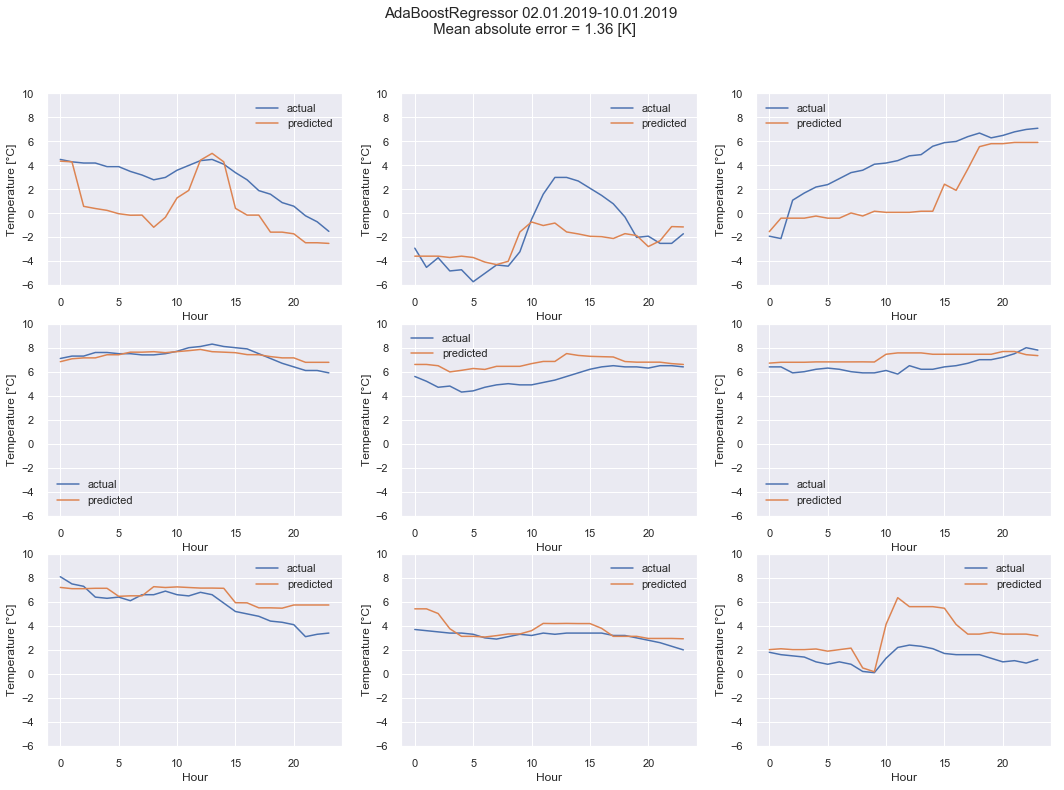

In [480]:
from sklearn.ensemble import AdaBoostRegressor

plt.figure(figsize=(18,12))
mae_sum=0

for i,j,k in zip(X_test_winter, X_train_winter, range(9)):
    
    X_train = X.loc[:j]
    X_test = X.loc[i]
    Y_train = Y.loc[:j]
    Y_test = Y.loc[i]
    
    regr = AdaBoostRegressor(random_state=0, n_estimators=200, learning_rate=0.5)
    regr.fit(X_train, Y_train)
    regr.feature_importances_
    y_pred = regr.predict(X_test)

    # Metrics
    mae0 = mean_absolute_error(Y_test.values.ravel(), y_pred)
    # sum of mean absolute error
    mae_sum+=abs(mae0)
   
    plt.subplot(3,3,k+1)
    prediction_plot(Y_test, y_pred,'Temperature [°C]','Images/Temp_ADA_winter.png','AdaBoostRegressor 02.01.2019-10.01.2019 \n Mean absolute error = '+str(round(mae_sum/9,2))+' [K]')
    

In [212]:
# Metrics
mae0 = mean_absolute_error(Y_test.values.ravel(), y_pred)
rmse0 = np.sqrt(mean_squared_error(Y_test.values.ravel(), y_pred))
r2 = r2_score(Y_test.values, y_pred)

# Print metrics
print('Mean Absolute Error:', round(mae0, 2))
print('RMSE:', round(rmse0, 2))
print('R2:', round(r2, 2))

Mean Absolute Error: 3.35
RMSE: 3.57
R2: -2.94


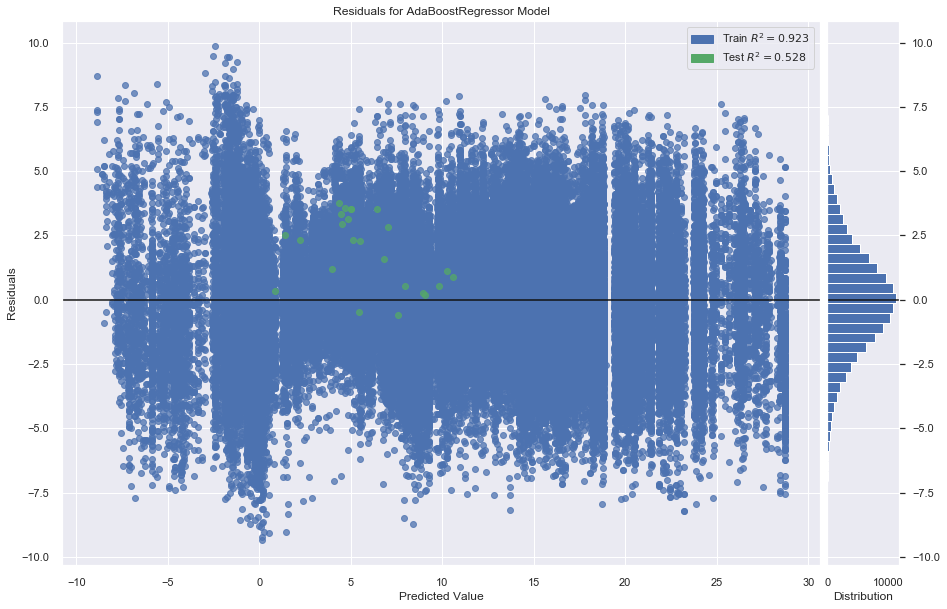

In [24]:
visualizer = ResidualsPlot(regr, size=(1080,720))
visualizer.fit(X_train, Y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, Y_test)  # Evaluate the model on the test data
visualizer.show(); 

## Random-Forest-Regressor

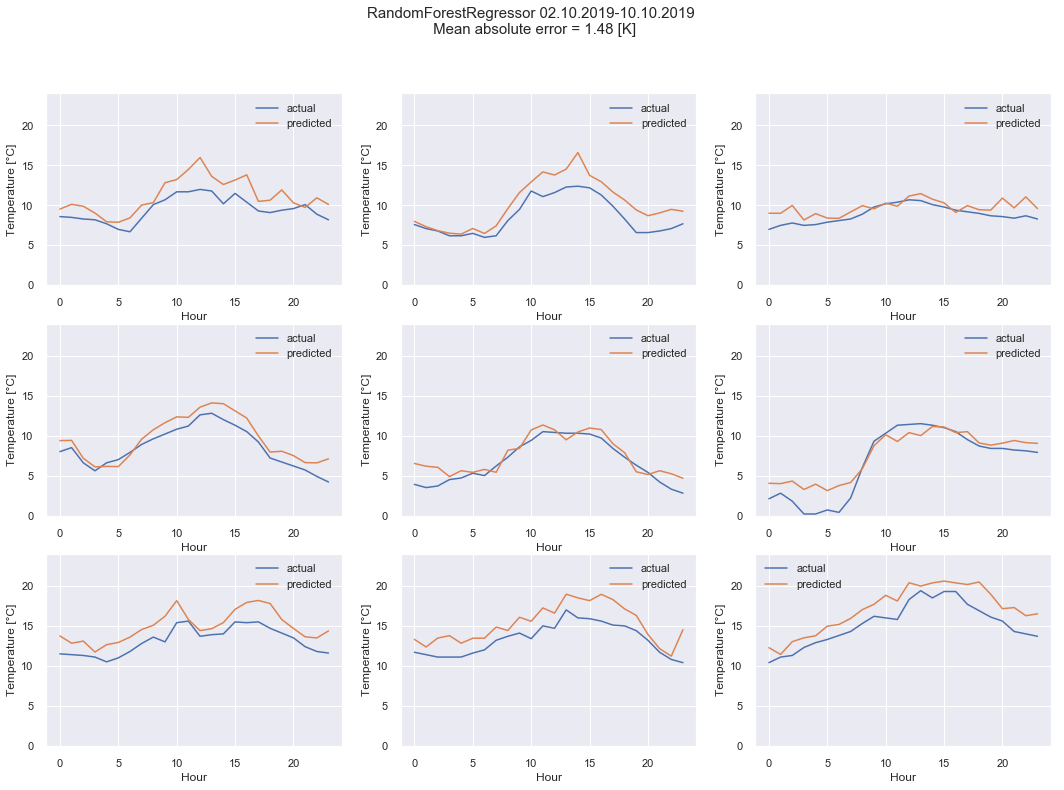

In [437]:
plt.figure(figsize=(18,12))
mae_sum=0

for i,j,k in zip(X_test_autumn, X_train_autumn, range(9)):
    
    X_train = X.loc[:j]
    X_test = X.loc[i]
    Y_train = Y.loc[:j]
    Y_test = Y.loc[i]
    
    rf = RandomForestRegressor(n_estimators = 100, random_state = 0)
    rf.fit(X_train, Y_train)
    y_pred = rf.predict(X_test)

    # Metrics
    mae0 = mean_absolute_error(Y_test.values.ravel(), y_pred)
    # sum of mean absolute error
    mae_sum+=abs(mae0)
   
    plt.subplot(3,3,k+1)
    prediction_plot(Y_test, y_pred,'Temperature [°C]','Images/Temp_RFR_autumn.png','RandomForestRegressor 02.10.2019-10.10.2019 \n Mean absolute error = '+str(round(mae_sum/9,2))+' [K]')
    


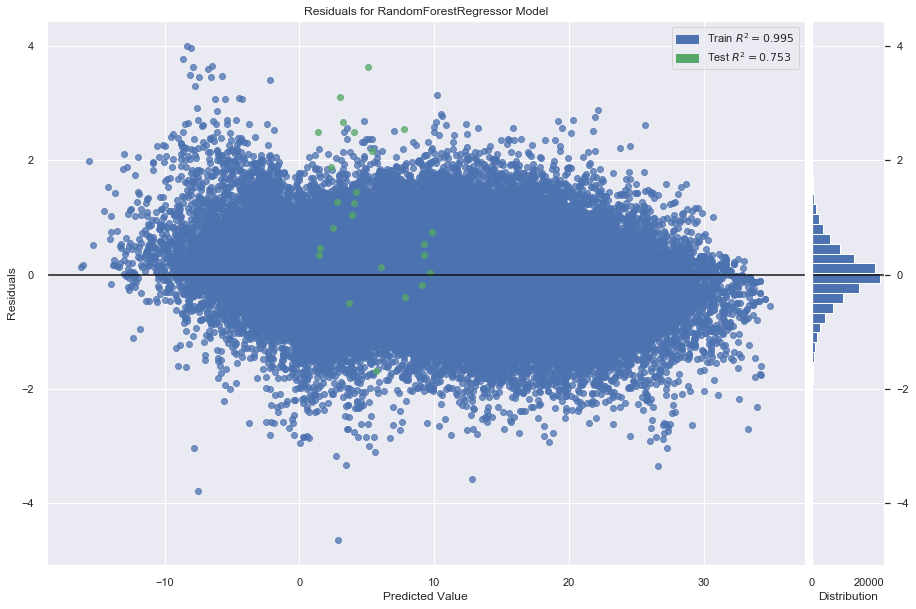

In [13]:
visualizer = ResidualsPlot(rf, size=(1080,720))
visualizer.fit(X_train, Y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, Y_test)  # Evaluate the model on the test data
visualizer.show(); 

In [216]:
## Feature importances :

feature_list = X.columns

# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: V_TE005              Importance: 0.92
Variable: ATMO_LBERG           Importance: 0.04
Variable: ZENIT                Importance: 0.02
Variable: FD_LBERG             Importance: 0.01
Variable: FG_LBERG             Importance: 0.01
Variable: V_VV                 Importance: 0.01
Variable: V_N                  Importance: 0.01


In [45]:
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestRegressor()

 
parameters = {'criterion': ['mse'],
              'max_depth': np.arange(3,11,1),
              'max_features': ['auto'],
              'max_leaf_nodes': [None],
              'min_impurity_decrease': [0.0],
              'min_impurity_split': [None],
              'min_samples_leaf': [1],
              'min_samples_split': [2],
              'min_weight_fraction_leaf': [0.0],
              'n_estimators': np.arange(10,100,1),
              'n_jobs': [-1],
              'oob_score': [False],
              'random_state': [0],
              'verbose': [0],
              'warm_start': [False]}


rf_grid = GridSearchCV(rf_model, parameters, cv = 5 ,n_jobs = 5, verbose=True)

rf_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   14.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.9min
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:  7.6min
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed: 14.0min
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed: 25.3min
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed: 43.9min
[Parallel(n_jobs=5)]: Done 2440 tasks      | elapsed: 64.9min
[Parallel(n_jobs=5)]: Done 3190 tasks      | elapsed: 99.8min
[Parallel(n_jobs=5)]: Done 3600 out of 3600 | elapsed: 121.4min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=Non...
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63,

In [46]:
rf_grid.best_params_

{'criterion': 'mse',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 69,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [56]:
## RandomForest with best parameters

rf = RandomForestRegressor(max_depth=None,max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf =0.0, n_estimators=1000, random_state=0, oob_score=False, verbose=0)
                           
rf.fit(X_train, Y_train)

Y_pred = rf.predict(X_test)

In [57]:
# Metrics
mae0 = mean_absolute_error(Y_test.values.ravel(), Y_pred)
rmse0 = np.sqrt(mean_squared_error(Y_test.values.ravel(), Y_pred))
r2 = r2_score(Y_test.values.ravel(), Y_pred)

# Print metrics
print('Mean Absolute Error:', round(mae0, 2))
print('RMSE:', round(rmse0, 2))
print('R2:', round(r2, 2))

Mean Absolute Error: 1.69
RMSE: 1.97
R2: 0.66


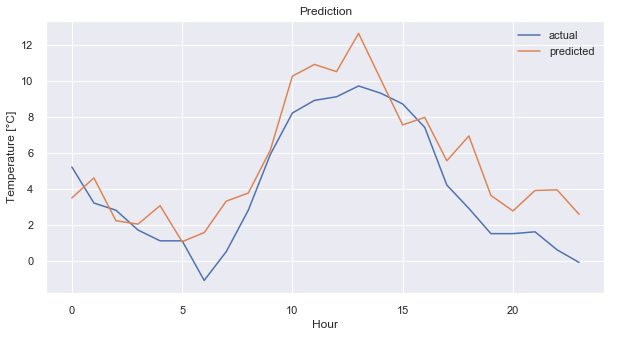

In [58]:
prediction_plot(Y_test, Y_pred,'Temperature [°C]')

## XGBoost Regressor

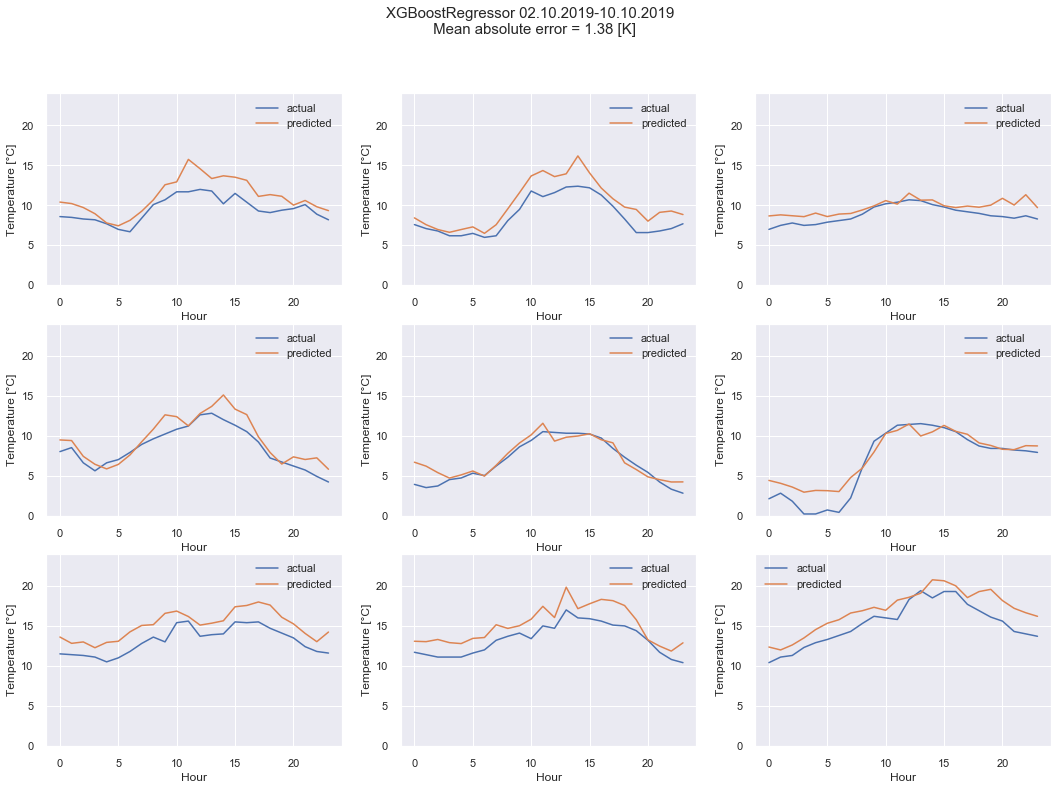

In [489]:
import xgboost as xgb

plt.figure(figsize=(18,12))
mae_sum=0

for i,j,k in zip(X_test_autumn, X_train_autumn, range(9)):
    
    X_train = X.loc[:j]
    X_test = X.loc[i]
    Y_train = Y.loc[:j]
    Y_test = Y.loc[i]
    
    model = xgb.XGBRegressor(n_estimators=500,learning_rate=0.7)
    model.fit(X_train,Y_train)
    y_pred = model.predict(data=X_test)

    # Metrics
    mae0 = mean_absolute_error(Y_test.values.ravel(), y_pred)
    # sum of mean absolute error
    mae_sum+=abs(mae0)
   
    plt.subplot(3,3,k+1)
    prediction_plot(Y_test, y_pred,'Temperature [°C]','Images/Temp_XGB_autumn.png','XGBoostRegressor 02.10.2019-10.10.2019 \n Mean absolute error = '+str(round(mae_sum/9,2))+' [K]')
    

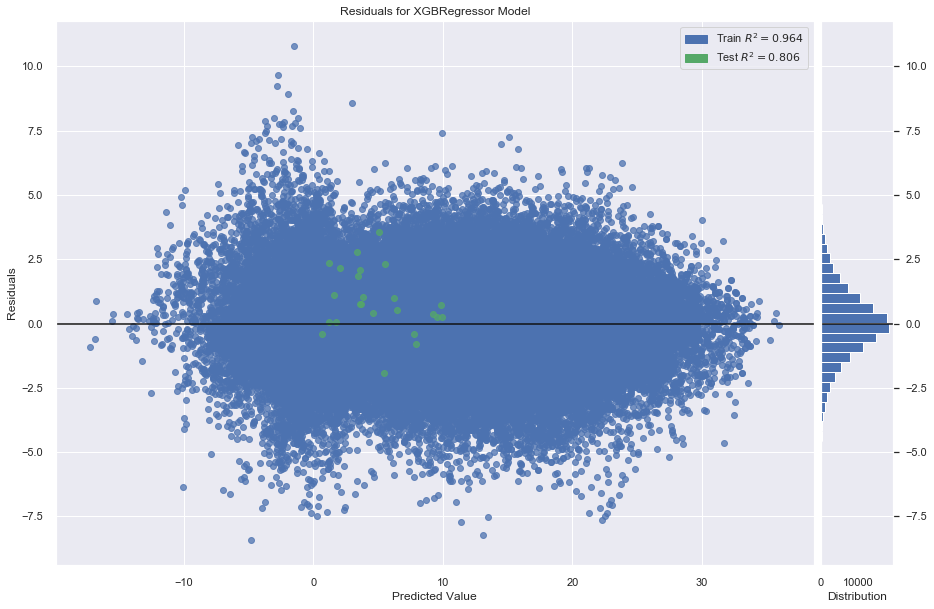

In [18]:
visualizer = ResidualsPlot(model, size=(1080,720))
visualizer.fit(X_train, Y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, Y_test)  # Evaluate the model on the test data
visualizer.show(); 

### XGBoost Regressor for 2018

In [98]:
# train/test split

X = df[['ATMO_LBERG', 'FD_LBERG', 'FG_LBERG', 'ZENIT', 'V_VV', 'V_N','V_TE005']]
Y = df.TT_TU

test_period = pd.date_range('2018-01-01', '2018-12-31', freq='D')
test_period = test_period.astype(str)
train_period = pd.date_range('2017-12-31', '2018-12-30', freq='D')
train_period = train_period.astype(str)

mae_sum=0
predictions = []
for i,j in zip(test_period, train_period):
    
    X_train = X.loc[:j]
    X_test = X.loc[i]
    Y_train = Y.loc[:j]
    Y_test = Y.loc[i]
    
    model = xgb.XGBRegressor(n_estimators=1000,learning_rate=0.7)
    model.fit(X_train,Y_train)
    y_pred = model.predict(data=X_test)
    predictions.append(y_pred)
    
    # Metrics
    mae0 = mean_absolute_error(Y_test.values.ravel(), y_pred)
    # sum of mean absolute error
    mae_sum+=abs(mae0)

predictions = pd.DataFrame(predictions)
predictions = predictions.stack().reset_index().rename(columns={0:'pred'})

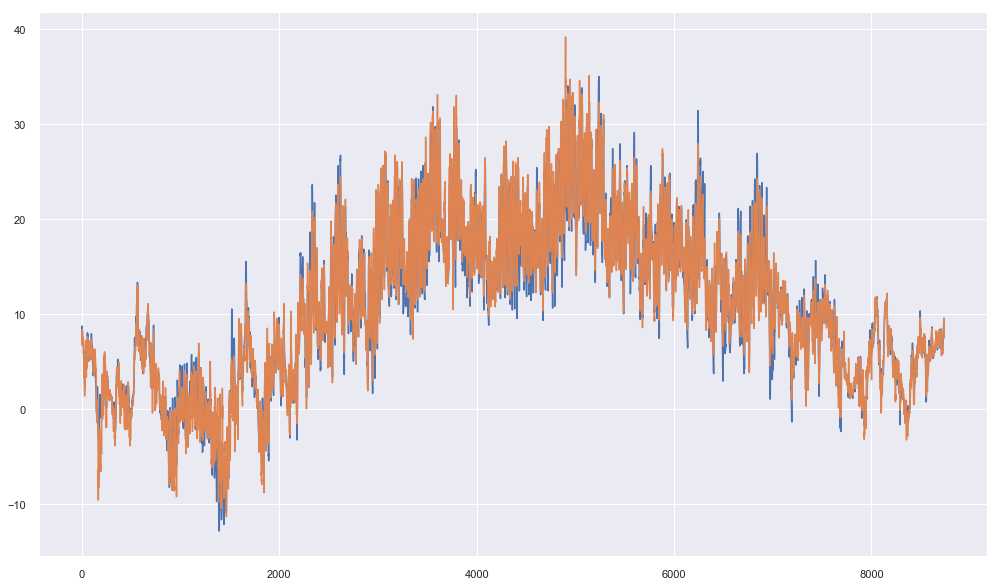

In [97]:
pred500 = predictions
plt.figure(figsize=(17,10))
plt.plot(Y.loc['2018-01-01':'2018-12-31'].values)
plt.plot(predictions.pred)

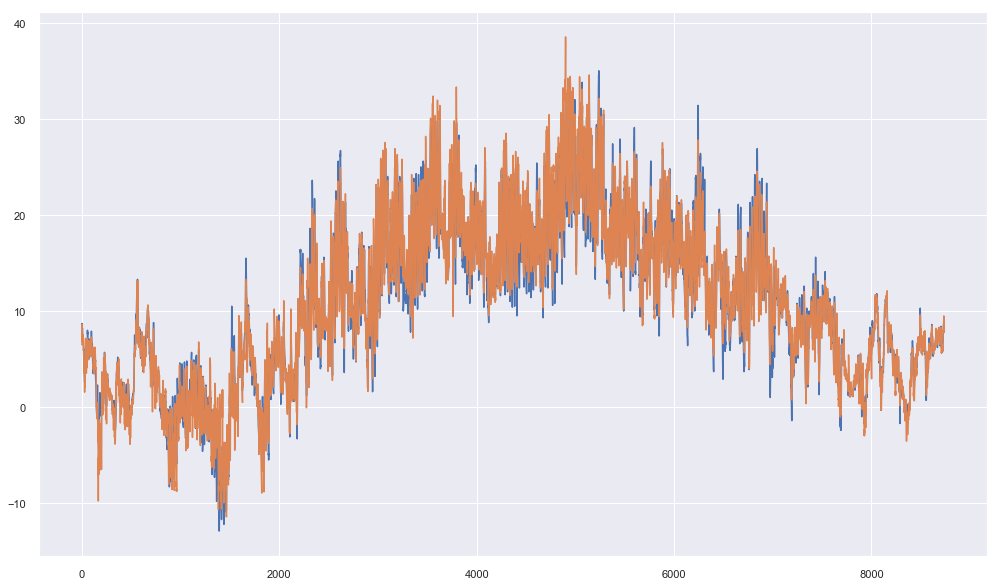

In [99]:
plt.figure(figsize=(17,10))
plt.plot(Y.loc['2018-01-01':'2018-12-31'].values)
plt.plot(predictions.pred)

In [94]:
mae_sum/365  # mean absolute error for 500 estimators

1.1759475886974373

In [100]:
mae_sum/365  # mean absolute error for 1000 estimators

1.1714633237884746

In [102]:
predictions.to_csv(r'Temp_XGB_2018_1000estimators.csv')

In [103]:
pred500.to_csv(r'Temp_XGB_2018_500estimators.csv')

In [60]:
from sklearn.model_selection import GridSearchCV

xgb_model = xgb.XGBRegressor()

#brute force scan for all parameters, here are the tricks
#usually max_depth is 6,7,8
#learning rate is around 0.05, but small changes may make big diff
#tuning min_child_weight subsample colsample_bytree can have 
#much fun of fighting against overfit 
#n_estimators is how many round of boosting
#finally, ensemble xgboost with multiple seeds may reduce variance
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': np.arange(0.1, 1, 0.2), #so called `eta` value
              'max_depth': np.arange(3,6,1),
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': np.arange(500,3000,500)}


xgb_grid = GridSearchCV(xgb_model, parameters, cv = 5 ,n_jobs = 5, verbose=True)

xgb_grid.fit(X_train,Y_train)



Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed: 10.5min
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed: 63.9min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed: 183.2min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bytree=1,
                                    gamma=0, learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=...
             iid='warn', n_jobs=5,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': array([0.1, 0.3, 0.5, 0.7, 0.9]),
                         'max_depth': array([3, 4, 5]), 'min_child_weight': [4],
                         'n_estimators': array([ 500, 1000, 1500, 2000, 2500]),
  

In [61]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

0.6683311628078997
{'colsample_bytree': 0.7, 'learning_rate': 0.30000000000000004, 'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 1000, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [62]:
model = xgb.XGBRegressor(colsample_bytree= 0.7, learning_rate= 0.3, max_depth= 3, min_child_weight= 4,
                         n_estimators= 1000, nthread= 4, silent= 1, subsample= 0.7)
model.fit(X_train,Y_train)

#Prediction
Y_pred = model.predict(data=X_test)

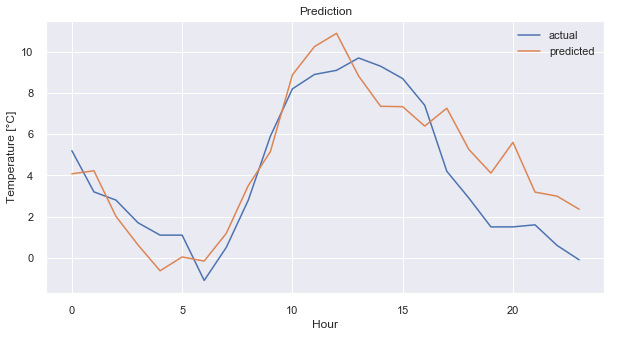

In [63]:
prediction_plot(Y_test, Y_pred,'Temperature [°C]')

In [64]:
# Metrics
mae0 = mean_absolute_error(Y_test.values.ravel(), Y_pred)
rmse0 = np.sqrt(mean_squared_error(Y_test.values.ravel(), Y_pred))
r2 = r2_score(Y_test.values.ravel(), Y_pred)

# Print metrics
print('Mean Absolute Error:', round(mae0, 2))
print('RMSE:', round(rmse0, 2))
print('R2:', round(r2, 2))

Mean Absolute Error: 1.56
RMSE: 1.79
R2: 0.73


In [26]:
X_train = X.loc[:'2019-10-28']
X_test = X.loc['2019-10-29']
Y_train = Y.loc[:'2019-10-28']
Y_test = Y.loc['2019-10-29']
    
model = xgb.XGBRegressor(n_estimators=2000,learning_rate=0.7)
model.fit(X_train,Y_train)
y_pred = model.predict(data=X_test)
print(mean_absolute_error(Y_test.values.ravel(), y_pred))


import plotly as py
import plotly.graph_objects as go
#from plotly.subplots import make_subplots


fig = go.Figure()
#fig = go.FigureWidget(data=data, layout=layout)
#x  = y_test_pred_avail_10min.index
#y1 = y_test_pred_avail_10min['EinsMan_true_norm']*100
#y2 = y_test_pred_avail_10min['EinsMan_pred_norm']*100
#y3 = y_test_pred_avail_10min['Power_avail_norm']*100
# show results only for timeframe:
#tf_start = '2019-10-29'
#tf_end   = '2019-10-29'
#timeframe = y_pred.index
x  = Y_test.index
y1 = y_pred
y2 = Y_test.values

fig.add_trace(go.Scatter(x=x, y=y2,
                         name='measured',
                         line_color='#1468A2',
                         line_width=3)) # deepskyblue
fig.add_trace(go.Scatter(x=x, y=y1,
                         name='predicted',
                         line_color='#FFCA1B',
                         line_width=3)) # dimgray, #29A073

fig.update_layout(title_text='XGBoostRegressor 29.10.2019',
                  #xaxis_title = 'Time',
                  yaxis_title = 'Temperature [°C]',
                  xaxis_title = 'Time',
                  #xaxis_rangeslider_visible=True,
                  #paper_bgcolor='#C8C8C8',
                  # font=dict(family='Courier New, monospace', size=18, color='#7F7F7F')
                  plot_bgcolor='#F0F0F0')
#fig.layout.on_change(zoom, 'xaxis.range')
#fig.hoverlabel.opacity=0.5
#fig.write_image('folder/image_name.png or jpeg or pdf)') # only select 3 day period of interest in dataframe
fig.show()


1.1900170656767757


In [25]:
X_train = X.loc[:'2019-01-08']
X_test = X.loc['2019-01-09']
Y_train = Y.loc[:'2019-01-08']
Y_test = Y.loc['2019-01-09']
    
#model = xgb.XGBRegressor(n_estimators=2000,learning_rate=0.7)
#model.fit(X_train,Y_train)
#y_pred = model.predict(data=X_test)


import plotly as py
import plotly.graph_objects as go
#from plotly.subplots import make_subplots


fig = go.Figure()
#fig = go.FigureWidget(data=data, layout=layout)
#x  = y_test_pred_avail_10min.index
#y1 = y_test_pred_avail_10min['EinsMan_true_norm']*100
#y2 = y_test_pred_avail_10min['EinsMan_pred_norm']*100
#y3 = y_test_pred_avail_10min['Power_avail_norm']*100
# show results only for timeframe:
#tf_start = '2019-10-29'
#tf_end   = '2019-10-29'
#timeframe = y_pred.index
x  = Y_test.index
y1 = y_pred
y2 = Y_test.values

fig.add_trace(go.Scatter(x=x, y=y2,
                         name='measured',
                         line_color='#1468A2',
                         line_width=3)) # deepskyblue
fig.add_trace(go.Scatter(x=x, y=y1,
                         name='predicted',
                         line_color='#FFCA1B',
                         line_width=3)) # dimgray, #29A073
fig.update_yaxes(range=[-2, 8])

fig.update_layout(title_text='XGBoostRegressor 09.01.2019',
                  #xaxis_title = 'Time',
                  yaxis_title = 'Temperature [°C]',
                  xaxis_title = 'Time',
                  #xaxis_rangeslider_visible=True,
                  #paper_bgcolor='#C8C8C8',
                  # font=dict(family='Courier New, monospace', size=18, color='#7F7F7F')
                  plot_bgcolor='#F0F0F0')
#fig.layout.on_change(zoom, 'xaxis.range')
#fig.hoverlabel.opacity=0.5
#fig.write_image('folder/image_name.png or jpeg or pdf)') # only select 3 day period of interest in dataframe
fig.show()


## KNeighborsRegressor

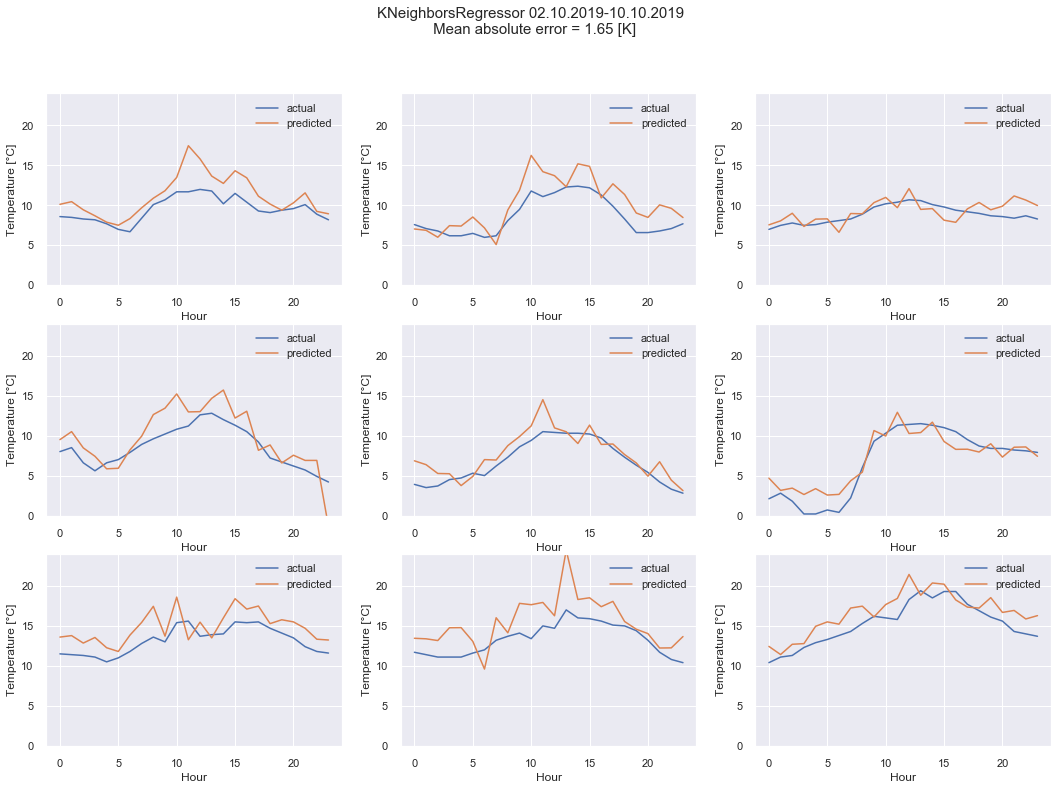

In [501]:
from sklearn.neighbors import KNeighborsRegressor

plt.figure(figsize=(18,12))
mae_sum=0

for i,j,k in zip(X_test_autumn, X_train_autumn, range(9)):
    
    X_train = X.loc[:j]
    X_test = X.loc[i]
    Y_train = Y.loc[:j]
    Y_test = Y.loc[i]
    
    knr = KNeighborsRegressor(n_neighbors=6)
    knr.fit(X_train, Y_train)
    y_pred = knr.predict(X_test)

    # Metrics
    mae0 = mean_absolute_error(Y_test.values.ravel(), y_pred)
    # sum of mean absolute error
    mae_sum+=abs(mae0)
   
    plt.subplot(3,3,k+1)
    prediction_plot(Y_test, y_pred,'Temperature [°C]','Images/Temp_KNN_autumn.png','KNeighborsRegressor 02.10.2019-10.10.2019 \n Mean absolute error = '+str(round(mae_sum/9,2))+' [K]')
    

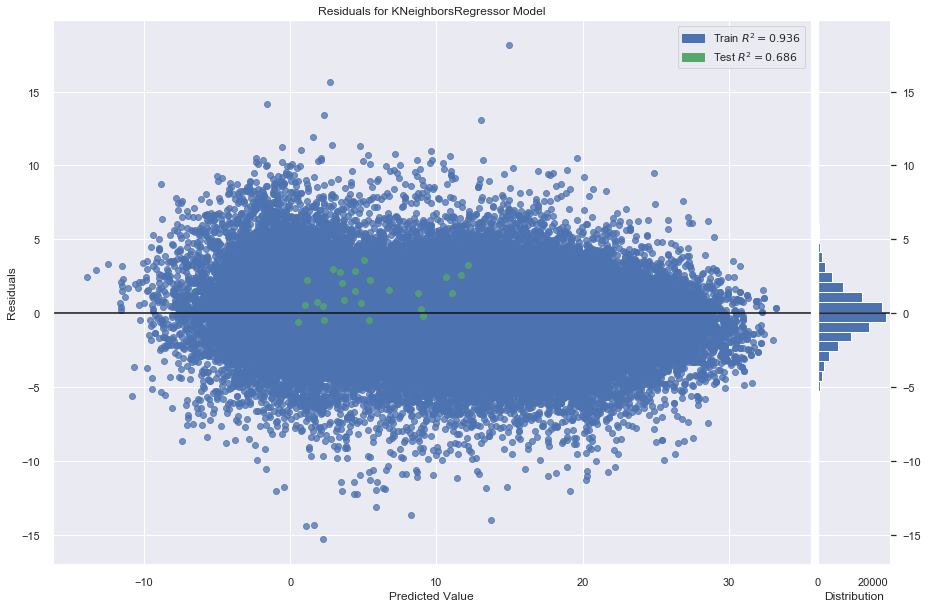

In [23]:
visualizer = ResidualsPlot(knr, size=(1080,720))
visualizer.fit(X_train, Y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, Y_test)  # Evaluate the model on the test data
visualizer.show();

In [236]:
# Metrics
mae0 = mean_absolute_error(Y_test.values.ravel(), Y_pred)
rmse0 = np.sqrt(mean_squared_error(Y_test.values.ravel(), Y_pred))
r2 = r2_score(Y_test.values.ravel(), Y_pred)

# Print metrics
print('Mean Absolute Error:', round(mae0, 4))
print('RMSE:', round(rmse0, 4))
print('R2:', round(r2, 4))

Mean Absolute Error: 1.7653
RMSE: 2.0447
R2: -0.292


## Support Vector Regressor

In [138]:
# take a lot of time and is bad!
from sklearn.svm import SVR
#clf = SVR(kernel='poly', degree=3, C=1.0, gamma='auto', epsilon=0.2)
#Y_pred = clf.fit(X_train, Y_train).predict(X_test)


In [ ]:
## Trying out different kernels

# #############################################################################
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)

# #############################################################################
# Look at the results
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(X, svr.fit(X, Y).predict(X), color=model_color[ix], lw=lw,
                  label='{} model'.format(kernel_label[ix]))
    axes[ix].scatter(X[svr.support_], Y[svr.support_], facecolor="none",
                     edgecolor=model_color[ix], s=50,
                     label='{} support vectors'.format(kernel_label[ix]))
    axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     Y[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     facecolor="none", edgecolor="k", s=50,
                     label='other training data')
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)

fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

In [ ]:
svr_poly
svr.fit(X, Y).predict(X)

## Auto Regressive Integrated Moving Average - ARIMA

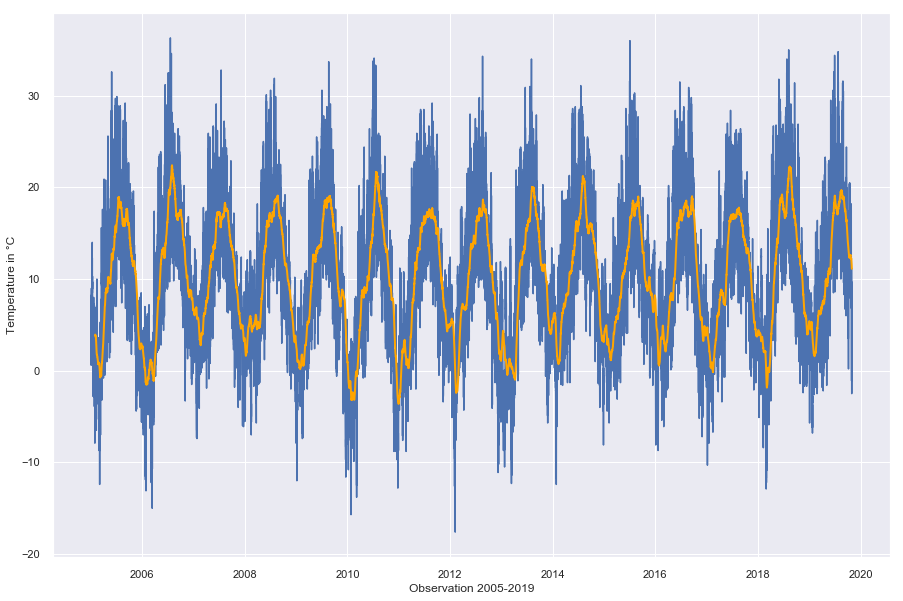

In [240]:
plt.figure(figsize=(15,10))

# generating rolling mean
rolling_mean = df.TT_TU.rolling(window=730).mean()   # 730 timesteps = monthly moving average
plt.xlabel('Observation 2005-2019')
plt.ylabel('Temperature in °C');
plt.plot(df.TT_TU)

# set rolling mean on monthly basis
plt.plot(rolling_mean, label='Monthly rolling mean of temperature 2005-2019', color='orange', linewidth=2)

plt.show()

In [247]:
#df_temp = pd.concat([df.MESS_DATUM,df.TT_TU],axis=1)
#df_temp.set_index(['MESS_DATUM'],inplace=True)
df_arima_temp = df.TT_TU[:'2018-07-01']
df_arima_temp.head()

#X_train = X.loc[:'2018-07-01']
#X_test = X.loc['2019-07-02']
#Y_train = Y[:'2018-07-01']
#Y_test = Y['2019-07-02']

MESS_DATUM
2005-01-01 00:00:00    4.7
2005-01-01 01:00:00    4.3
2005-01-01 02:00:00    3.1
2005-01-01 06:00:00    2.0
2005-01-01 07:00:00    2.7
Name: TT_TU, dtype: float64

In [249]:
print(df_arima_temp.shape, df.TT_TU.shape)

(117939,) (129579,)


In [250]:
# Determine rolling statistics
rolmean = df.TT_TU.rolling(window=720).mean() #window size 720 denotes 1 month, giving rolling mean at yearly level
rolstd = df.TT_TU.rolling(window=720).std()
# print(rolmean,rolstd)

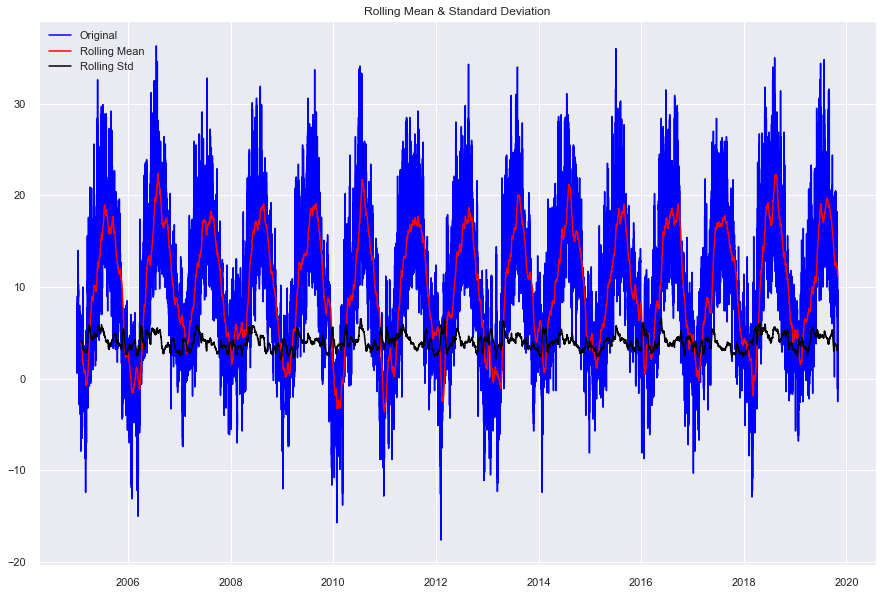

In [259]:
# Plot rolling statistics
plt.figure(figsize=(15,10))
plt.plot(df.TT_TU, color='blue', label='Original')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [262]:
# Perform Augmented Dickey–Fuller test:

print('Results of Dickey Fuller Test:')
dftest = adfuller(df.TT_TU, autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                -1.076913e+01
p-value                        2.409425e-19
#Lags Used                     7.200000e+01
Number of Observations Used    1.295060e+05
Critical Value (1%)           -3.430400e+00
Critical Value (5%)           -2.861562e+00
Critical Value (10%)          -2.566782e+00
dtype: float64


In [ ]:
#For a Time series to be stationary, its ADCF test should have:

# p-value to be low (according to the null hypothesis)  ---> accomplished
# The critical values at 1%, 5%, 10% confidence intervals should be as close as possible to the Test Statistics!
## The dataset is stationary!

## For non stationary dataset there are diffenent ways to achieve stationary: transformation with log, 
## exponential decay and time shift

In [ ]:
model = ARIMA(df.TT_TU, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.figure(figsize=(15,10))
plt.plot(df.TT_TU)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - df.TT_TU)**2))
print('Plotting ARIMA model')


//anaconda3/envs/nf/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
//anaconda3/envs/nf/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Plotting ARIMA model


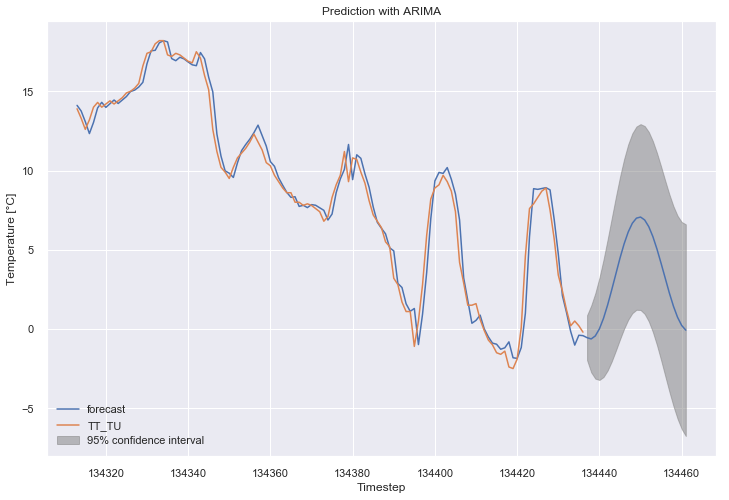

In [19]:
#We have 144(existing data of 12 yrs in months) data points. 
#And we want to forecast for additional 120 data points or 10 yrs.

sns.set(rc={'figure.figsize':(12,8)})

results_ARIMA.plot_predict(len(df.TT_TU)-124,len(df.TT_TU)+24);
plt.legend(loc='lower left')
plt.title('Prediction with ARIMA')
plt.xlabel('Timestep')
plt.ylabel('Temperature [°C]')
x=results_ARIMA.forecast(steps=24)

In [11]:
model = ARIMA(df_arima_temp.values, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)

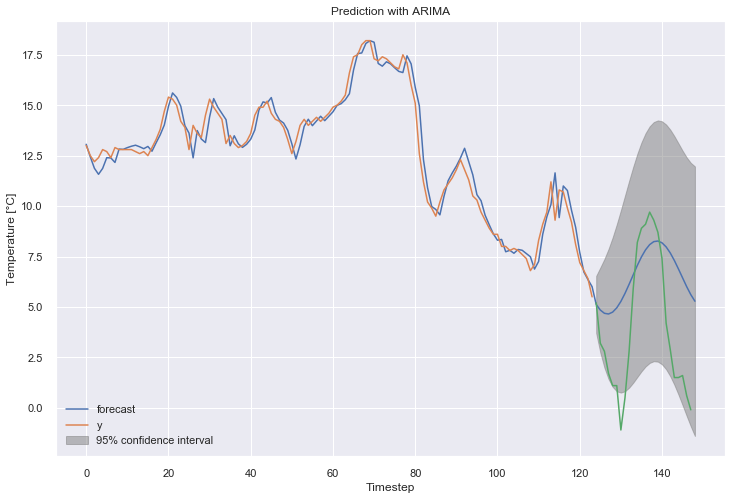

In [22]:
sns.set(rc={'figure.figsize':(12,8)})

results_ARIMA.plot_predict(len(df_arima_temp)-124,len(df_arima_temp)+24);
plt.legend(loc='lower left')
plt.title('Prediction with ARIMA')
plt.xlabel('Timestep')
plt.ylabel('Temperature [°C]')
x=results_ARIMA.forecast(steps=24)
plt.plot(range(124,148,1),df_temp.TT_TU.values[-48:-24])

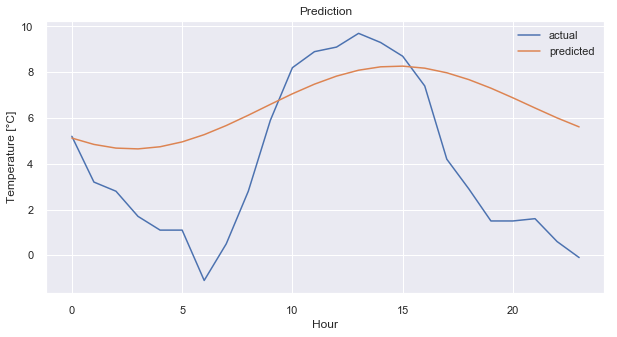

In [32]:
prediction_plot(df_temp.TT_TU[-48:-24], pd.DataFrame(x[0]))

In [35]:
# Metrics
mae0 = mean_absolute_error(df_temp.TT_TU[-48:-24], pd.DataFrame(x[0]))
rmse0 = np.sqrt(mean_squared_error(df_temp.TT_TU[-48:-24], pd.DataFrame(x[0])))
r2 = r2_score(df_temp.TT_TU[-48:-24],  pd.DataFrame(x[0]))

# Print metrics
print('Mean Absolute Error:', round(mae0, 2))
print('RMSE:', round(rmse0, 2))
print('R2:', round(r2, 2))

Mean Absolute Error: 3.04
RMSE: 3.63
R2: -0.14


## SARIMAX Regression

In [ ]:
# go through all 27 combinations for p,d,q
p_values = [0,1,2]
d_values = [0,1,2]
q_values = [0,1,2]

error = []
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p,d,q)
            model = sm.tsa.statespace.SARIMAX(Y_train, exog=X_train, error_action='ignore', trend='c', order=order, seasonal_order=(1,0,5,1))
            model_fit = model.fit()
            y_pred = model_fit.predict(start=len(X_train), end=len(X_train)+23, exog = X_test)
            error.append(mean_absolute_error(Y_test.values.ravel(), y_pred))
            print('ARIMA%s MAE=%.3f' % (order,mean_absolute_error(Y_test.values.ravel(), y_pred)))

//anaconda3/envs/nf/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
//anaconda3/envs/nf/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
//anaconda3/envs/nf/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
//anaconda3/envs/nf/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueW

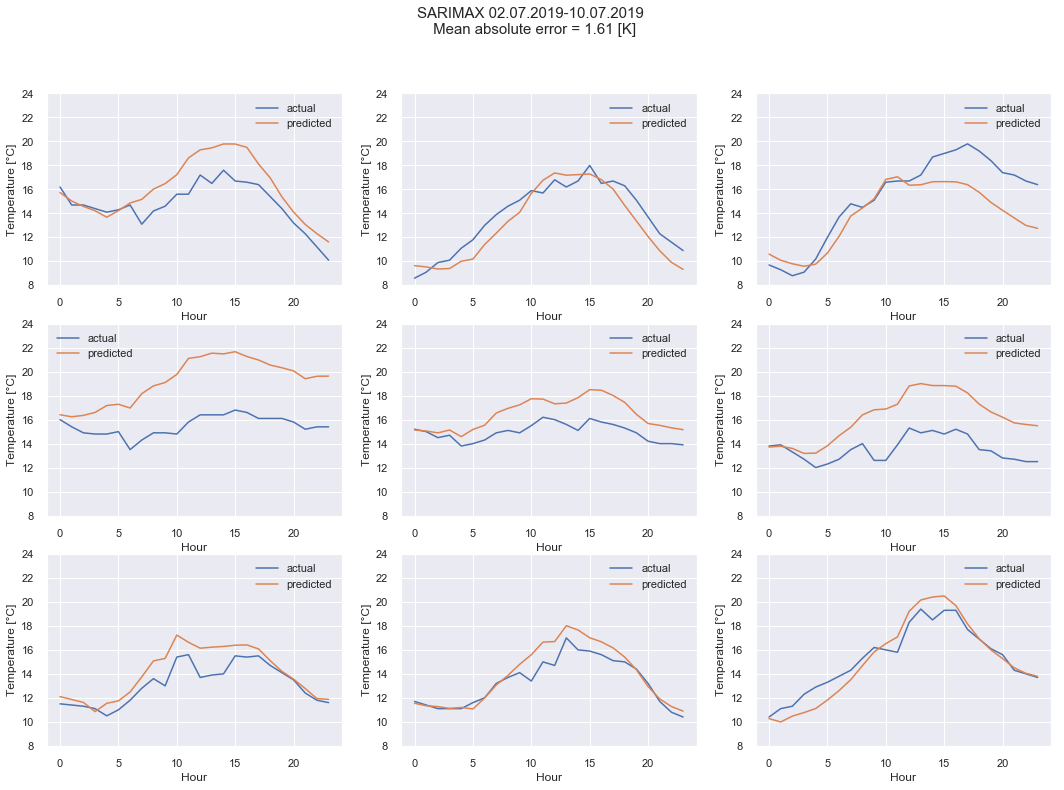

In [512]:
# best combination

plt.figure(figsize=(18,12))
mae_sum=0

for i,j,k in zip(X_test_summer, X_train_summer, range(9)):
    
    X_train = X.loc[:j]
    X_test = X.loc[i]
    Y_train = Y.loc[:j]
    Y_test = Y.loc[i]
    
    model = sm.tsa.statespace.SARIMAX(Y_train, exog=X_train, trend='c', order=(2,2,1),seasonal_order=(1,0,5,1))
    model_fit = model.fit()
    y_pred = model_fit.predict(start=len(X_train), end=len(X_train)+23, exog = X_test)
    #x = model_fit.forecast(24) # forecast!

    # Metrics
    mae0 = mean_absolute_error(Y_test.values.ravel(), y_pred)
    # sum of mean absolute error
    mae_sum+=abs(mae0)
   
    plt.subplot(3,3,k+1)
    prediction_plot(Y_test, y_pred.values,'Temperature [°C]','Images/Temp_SARIMAX_summer.png','SARIMAX 02.07.2019-10.07.2019 \n Mean absolute error = '+str(round(mae_sum/9,2))+' [K]')
    

In [264]:
# Metrics
mae0 = mean_absolute_error(Y_test.values.ravel(), y_pred)
rmse0 = np.sqrt(mean_squared_error(Y_test.values.ravel(), y_pred))
r2 = r2_score(Y_test.values.ravel(), y_pred)

# Print metrics
print('Mean Absolute Error:', round(mae0, 2))
print('RMSE:', round(rmse0, 2))
print('R2:', round(r2, 2))

Mean Absolute Error: 1.51
RMSE: 1.77
R2: 0.03
